<a href="https://colab.research.google.com/github/jeanmacedus-crypto/Testando_hipoteses/blob/main/Caso_Techtast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# O cliente é um restaurante de delivery chamado TechTaste.
# Nele, foi introduzido um novo estilo de atendimento ao cliente - agora com um chat de inteligência artificial.
# Para avaliar a eficácia da IA, foram coletadas várias avaliações de clientes que tiveram contato com o novo chat da TechTaste.
# Uma amostra com 80 avaliações foi separada para a análise. As notas foram dadas dentro de um intervalo de 0 a 100.

In [3]:
# dados das avaliaçoes
import pandas as pd

# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})
df_techtaste

,avaliacoes
0,38
1,44
2,33
3,42
4,47
...,...
75,47
76,40
77,50
78,37


In [4]:
#criando a média
media = df_techtaste.mean()
media

,0
avaliacoes,40.025


In [5]:
# Calcule o desvio padrão amostral das avaliações.
desvio_padrao = df_techtaste['avaliacoes'].std()
desvio_padrao

6.421827887581661

In [6]:

# Calcule o erro padrão amostral da média para as avaliações dos clientes.
from scipy import stats

erro_padrao = stats.sem(df_techtaste['avaliacoes'])
erro_padrao


np.float64(0.7179821848218233)

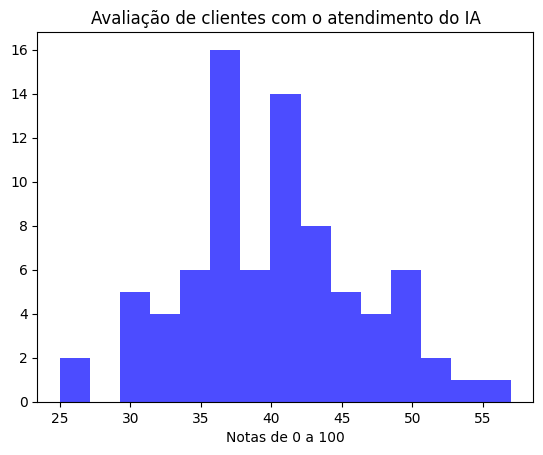

In [7]:

# Utilizando um gráfico de histograma, analise visualmente a distribuição das avaliações dos clientes.
import matplotlib.pyplot as plt

plt.hist(df_techtaste['avaliacoes'], bins=15, alpha=0.7, color='b')
plt.title('Avaliação de clientes com o atendimento do IA')
plt.xlabel('Notas de 0 a 100')

plt.show()


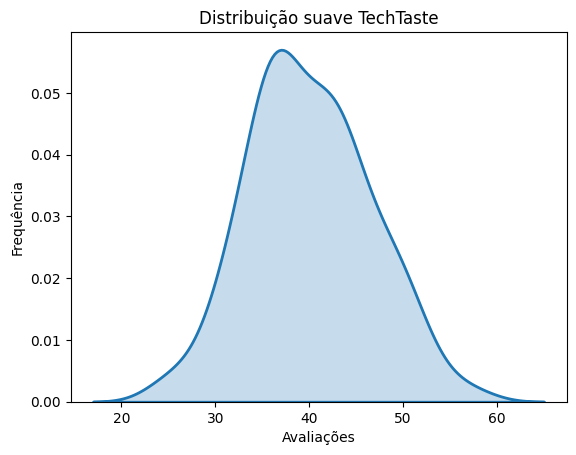

In [8]:

# Observe o formato da distribuição gerado no histograma. Ele se assemelha a uma distribuição normal?

import seaborn as sns

sns.kdeplot(df_techtaste['avaliacoes'], linewidth=2, fill= True)

plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.title('Distribuição suave TechTaste')
plt.show()



In [9]:
# Com um nível de confiança de 90%, calcule o intervalo de confiança para a média das avaliações.
confianca = 0.90
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=df_techtaste['avaliacoes'].mean() ,
                                       scale=erro_padrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')



Intervalo de Confiança (90.0%): (np.float64(38.84402439920928), np.float64(41.205975600790715))


In [10]:
# A largura do intervalo de confiança seria afetada se o nível de confiança fosse aumentado para 95%?
confianca = 0.95
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=df_techtaste['avaliacoes'].mean() ,
                                       scale=erro_padrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (95.0%): (np.float64(38.617780776207844), np.float64(41.43221922379215))


In [11]:
# Calcule a média amostral das avaliações.
media_amostral = df_techtaste['avaliacoes'].mean()
media_amostral

np.float64(40.025)

''''
H0: u = 30
H0: u != 30
'''

In [12]:
# Formule hipóteses para o problema da empresa.

# o IA é uma ferramenta eficaz para a empresa

In [19]:
# Estabelecidos o nível de confiança em 95% e o desvio padrão populacional em 2.65,
# verifique se a média da amostra está definida dentro do intervalo de confiança da hipótese nula.

import numpy as np

# Valores previamente especificados
confianca = 0.95
desvio_padrao_populacional = 2.65

# Outros valores para calcular o intervalo
tamanho_amostra = len(df_techtaste)
media_nula = 30

from scipy import stats
intervalo_confianca = stats.norm.interval(confianca,
                                       loc= media_nula,
                                       scale=(desvio_padrao_populacional)/np.sqrt(tamanho_amostra))

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (95.0%): (np.float64(29.419303816868016), np.float64(30.580696183131984))


In [13]:
# importando o teste Z do statsmodels
from statsmodels.stats.weightstats import ztest

In [22]:
# executando o teste z
stats, p_valor = ztest(x1=df_techtaste['avaliacoes'], value=media_nula, alternative = "two-sided")

In [23]:
# exibe os resultados

print(f'Estatística Z: {stats}')
print(f'Valor-p: {p_valor}')

Estatística Z: 13.96274198988354
Valor-p: 2.6311293593122384e-44


In [26]:
# verifica a hipótese nula com base no valor-p
nivel_signicancia = 0.5
if p_valor < nivel_signicancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeitar a hipótese nula"

print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula


In [ ]:
#O que é possível entender a partir do resultado da etapa anterior?

#Que as pessoas estão satisfeitas com o atendimento do IA